# About 
In this notebook the dataset is plotted before and after making cuts.  Start by loading standard imports.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import sys 

%matplotlib inline 

### Import utilities
The utilities used in the source directory for `bsa.py` are imported here by adding that directory to the system path.

In [2]:
sys.path.append(os.path.normpath(os.getcwd() + '/../src/data'))
import bsa, utils

In [3]:
config_file = '../config-laptop.json'
config = utils.load_config(config_file)

# This will ensure all data is loaded.
config['sample_size'] = 100000

# Raw dataset loading
data = utils.load_dataset(config)

# Filtered data 
nom_filter = utils.build_filter(data)
nom_data = utils.build_dataframe(data, nom_filter)

# Bins for axes 
bins = bsa.setup_binning(config, nom_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98492 entries, 0 to 99999
Data columns (total 30 columns):
Unnamed: 0       98492 non-null int64
helicity         98492 non-null int64
meson_id         98492 non-null int64
missing_mass     98492 non-null float64
x                98492 non-null float64
q2               98492 non-null float64
z                98492 non-null float64
pt               98492 non-null float64
w                98492 non-null float64
eta              98492 non-null float64
phi_h            98492 non-null float64
theta_h          98492 non-null float64
p_ele            98492 non-null float64
p_mes            98492 non-null float64
phi_ele          98492 non-null float64
phi_mes          98492 non-null float64
theta_ele        98492 non-null float64
theta_mes        98492 non-null float64
dvz              98492 non-null float64
alpha            98492 non-null float64
dist_ecsf        98492 non-null float64
dist_ec_edep     98492 non-null float64
dist_vz          

### Plotting Options 
Here some basic options and customizations are defined.  Using latex for the axes labels takes a long time, so that option should be false until the final plots are drawn.

In [4]:
plt.rc('font', family='serif')
plt.rc('font', size=20)
plt.rc('text', usetex=True)

basic_histo = {
    'alpha':0.6,
    'histtype':'step'
}

filled_histo = {
    'alpha':0.4,
    'edgecolor':'k'
}

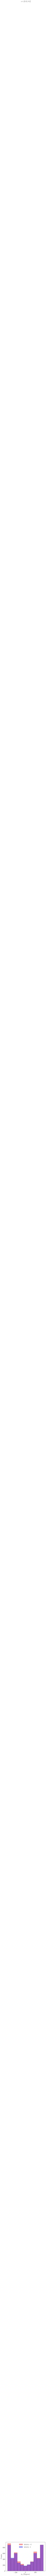

In [5]:
pos = np.where((nom_data['helicity'].values > 0) & (nom_data['x'].values > 0.12) & (nom_data['x'].values < 0.20))
neg = np.where((nom_data['helicity'].values < 0) & (nom_data['x'].values > 0.12) & (nom_data['x'].values < 0.20))

phi_bins = np.linspace(-180, 180, 12)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data.iloc[pos]['phi_h'], color='red', bins=phi_bins, label='helicity +1', **filled_histo);
ax.hist(nom_data.iloc[neg]['phi_h'], color='blue', bins=phi_bins, label='helicity -1', **filled_histo);
ax.legend(frameon=False, loc='best')
ax.set_xlabel('$\phi_h$ (Degrees)')
ax.set_ylabel('Counts')
ax.text(-45, 87500, '$x \in [0.12, 0.2]$')
fig.savefig('../image/xcounts.pdf', bbox_inches='tight')

Using 4 rows.


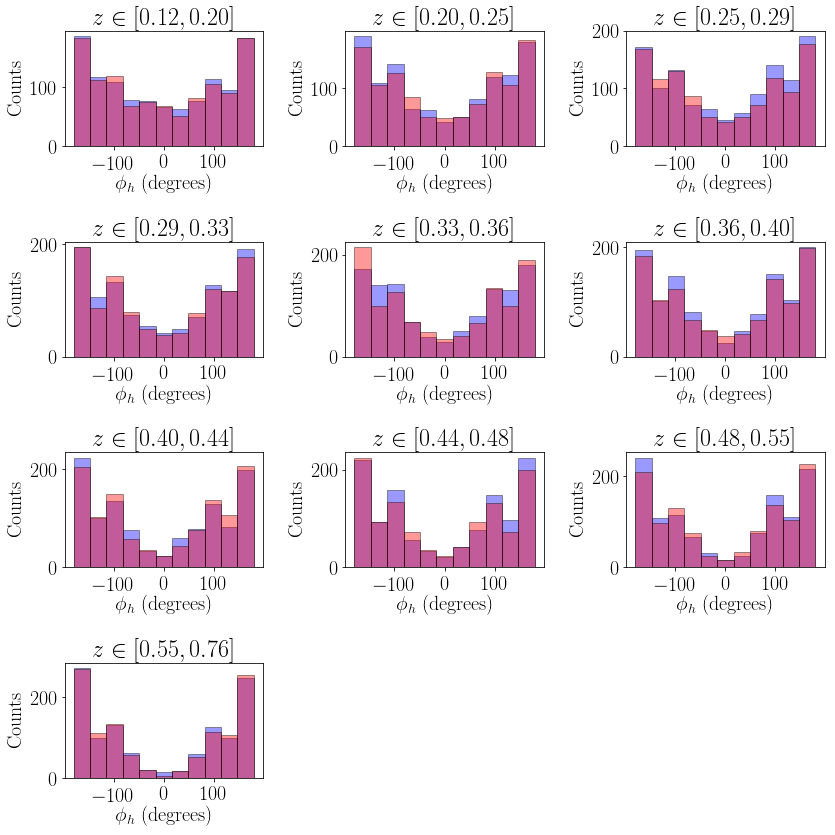

In [6]:
axis = 'z'    
n_bins = len(bins[axis])
n_cols = 3
n_rows = 1 + np.ceil(n_bins/n_cols)

print('Using %d rows.' % n_rows)
fig = plt.figure(figsize=(4*n_cols, 3*n_rows))

for i in range(n_bins-1):
    pos = np.where((nom_data[axis].values > bins[axis][i]) & (nom_data[axis].values < bins[axis][i+1]) & (nom_data['helicity'].values > 0))
    neg = np.where((nom_data[axis].values > bins[axis][i]) & (nom_data[axis].values < bins[axis][i+1]) & (nom_data['helicity'].values < 0))

    ax = fig.add_subplot(n_rows, n_cols, i+1)
    ax.hist(nom_data.iloc[pos]['phi_h'], 
            color='blue', 
            bins=phi_bins, 
            **filled_histo);
    ax.hist(nom_data.iloc[neg]['phi_h'], 
            color='red', 
            bins=phi_bins, 
            **filled_histo);
    
    ax.set_xlabel('$\phi_h$ (degrees)')
    ax.set_ylabel('Counts')
    
    bin_string = '$%s \in [%.2f, %.2f]$' % (axis, bins[axis][i], bins[axis][i+1])
    ax.set_title(bin_string)
    
fig.tight_layout()
fig.savefig('../image/z-phi-counts.pdf', bbox_inches='tight')

In [7]:
from matplotlib.colors import LogNorm

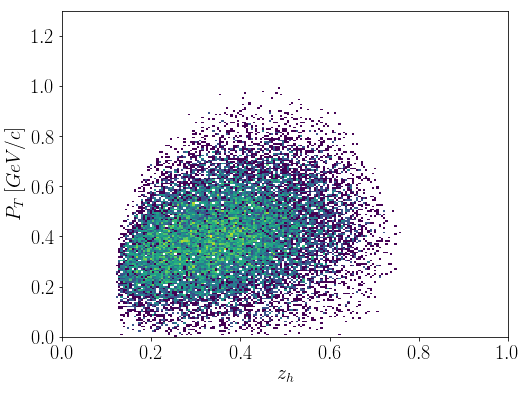

In [8]:
hbins = (np.linspace(0, 1, 200), 
        np.linspace(0, 1.3, 200))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['z'], 
          nom_data['pt'], 
         bins=hbins,
         norm=LogNorm());
ax.set_xlabel('$z_h$')
ax.set_ylabel('$P_{T} \; [GeV/c]$')
fig.savefig('../image/z-pt.pdf', bbox_inches='tight')

In [9]:
filt = {'missing_mass':[0.0, 5.0]}
nom_filter = utils.build_filter(data, filt)
nom_data = utils.build_dataframe(data, nom_filter)

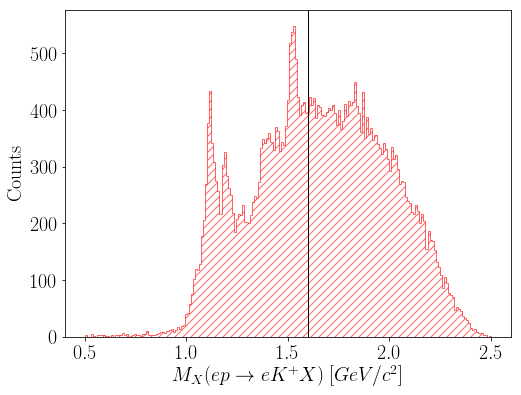

In [10]:
mx_bins = np.linspace(0.5, 2.5, 200)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data['missing_mass'], color='red', hatch='///', bins=mx_bins, **basic_histo);
#ax.legend(frameon=False)
ax.set_xlabel('$M_X (ep \\rightarrow eK^+X) \; [GeV/c^2]$')
ax.set_ylabel('Counts')
ax.axvline(1.62, color='k', linewidth=1, linestyle='-.')
fig.savefig('../image/mx.pdf', bbox_inches='tight')

In [11]:
nom_filter = utils.build_filter(data)
nom_data = utils.build_dataframe(data, nom_filter)

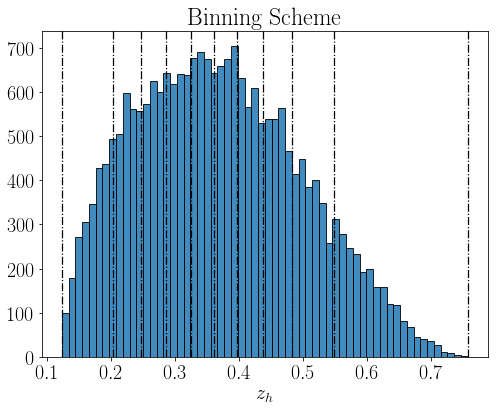

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(nom_data['z'], bins=60, alpha=0.85, edgecolor='k');
ax.set_title('Binning Scheme')
ax.set_xlabel('$z_h$')

for bin_edge in bins['z']:
    ax.axvline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)

plt.savefig('../image/binning_z.pdf', bbox_inches='tight')

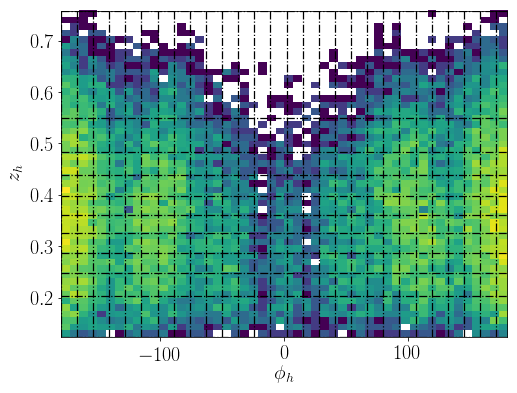

In [13]:
plt.figure(figsize=(8,6))
plt.hist2d(nom_data['phi_h'], nom_data['z'], 
           bins=50, norm=LogNorm());

for bin_edge in bins['z']:
    plt.axhline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)

for bin_edge in np.arange(-180, 180, 13):
    plt.axvline(bin_edge, linestyle='-.', 
                    color='black', linewidth=1.25)  
    
plt.xlabel('$\phi_h$')
plt.ylabel('$z_h$')
plt.savefig('../image/binning_z_phi.pdf', bbox_inches='tight')

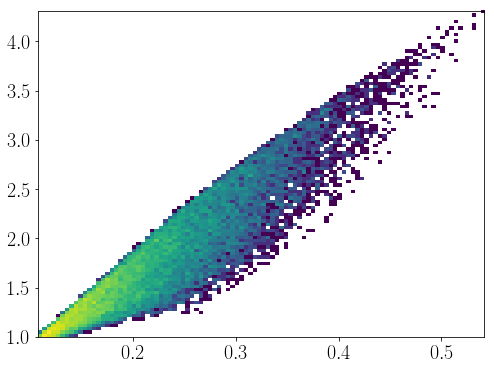

In [14]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['x'], nom_data['q2'], 
          bins=100, norm=LogNorm());

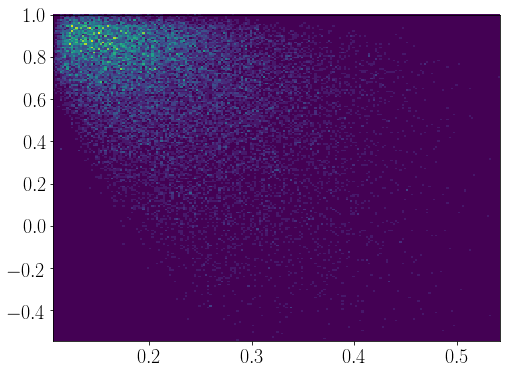

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist2d(nom_data['x'], nom_data['dist_ecw'], 
          bins=200);

In [16]:
var_corrs = nom_data.corr()[['x', 'q2', 'z', 'pt']]

In [17]:
def inverse_d_transform(d, mini, maxi):
    return (d * (maxi-mini) + (maxi+mini)) / 2.0

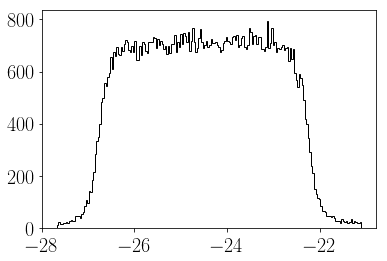

In [18]:
plt.hist(
    inverse_d_transform(data['dist_vz'], -27, -21.85),
        histtype='step', color='black', bins=200
);